# Matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Since `matplotlib` is primarily a graphing library rather than a conventional object-oriented toolkit, it can be more helpful to understand matplotlib in terms of how it builds a plot instead of beginning with classes like `Figure`, `Axes`, or `Artist`:

- At the top level, you have the **figure** — the canvas or overall container for your plot.
- Inside a figure, you can place one or more **axes** (one axes: x axis, y axis, and etc.), which represent individual coordinate systems.
- Within each axes, you add **graphical elements** — lines, bars, text, ticks, etc.
- Render the plot: `plt.show()`
- Save the plot: `plt.savefig()`

## I. Figure and Axes

A figure (class `Figure`) can be created by `plt.figure()`. However, by itself, a figure is just an empty canvas. To display any meaningful content, you need to add at least one axes (class `Axes`) — without it, nothing will be visible on the plot.

In [2]:
fig = plt.figure() # empty figure
print(type(fig))
plt.show()

<class 'matplotlib.figure.Figure'>


<Figure size 640x480 with 0 Axes>

<class 'matplotlib.figure.Figure'> <class 'matplotlib.axes._axes.Axes'>


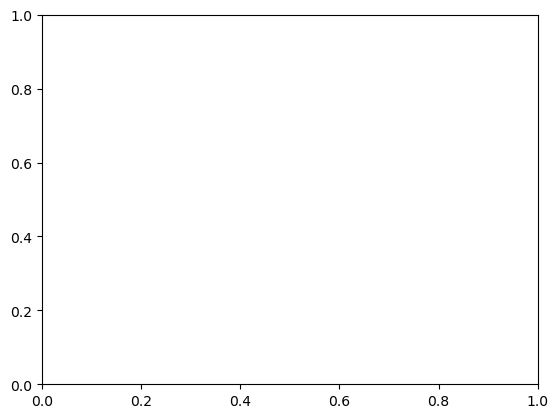

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) # equivalent to fig.add_subplot(111)
print(type(fig), type(ax))
plt.show() # In Jupyter notebook, plt.show() is optional. However, in scripts (.py), it is necessary to display the figure.

Why is it called subplot? Because we can add multiple axes.

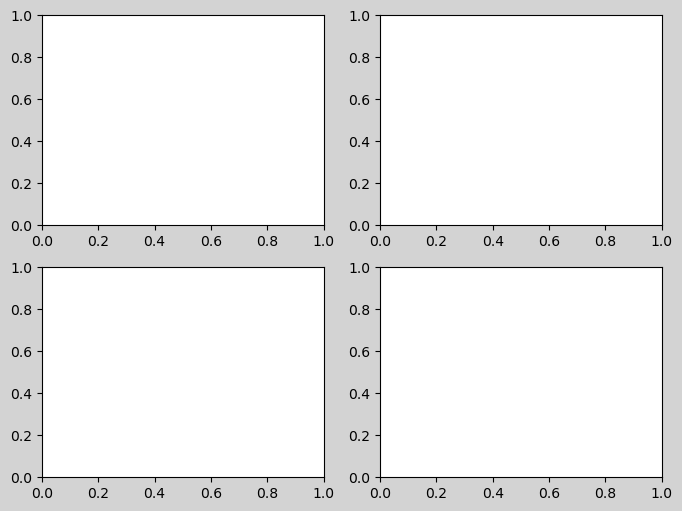

In [4]:
fig = plt.figure(figsize = (8,6), facecolor='lightgrey') # figsize: width, height in inches, facecolor: background color.
ax1 = fig.add_subplot(2, 2, 1) # Can you guess what these numbers mean?
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
plt.show()

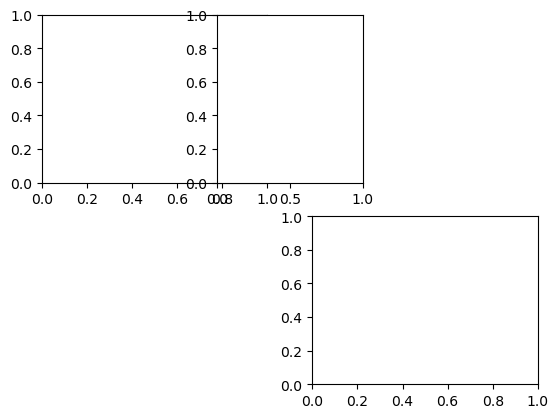

In [5]:
## Can you guess the result of the following code?
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 2, 4)
plt.show()

#### Standard way of creating a figure and axes

In practice, however, we create a figure and (possibly multiple) axes at the same time by `plt.subplots()`.

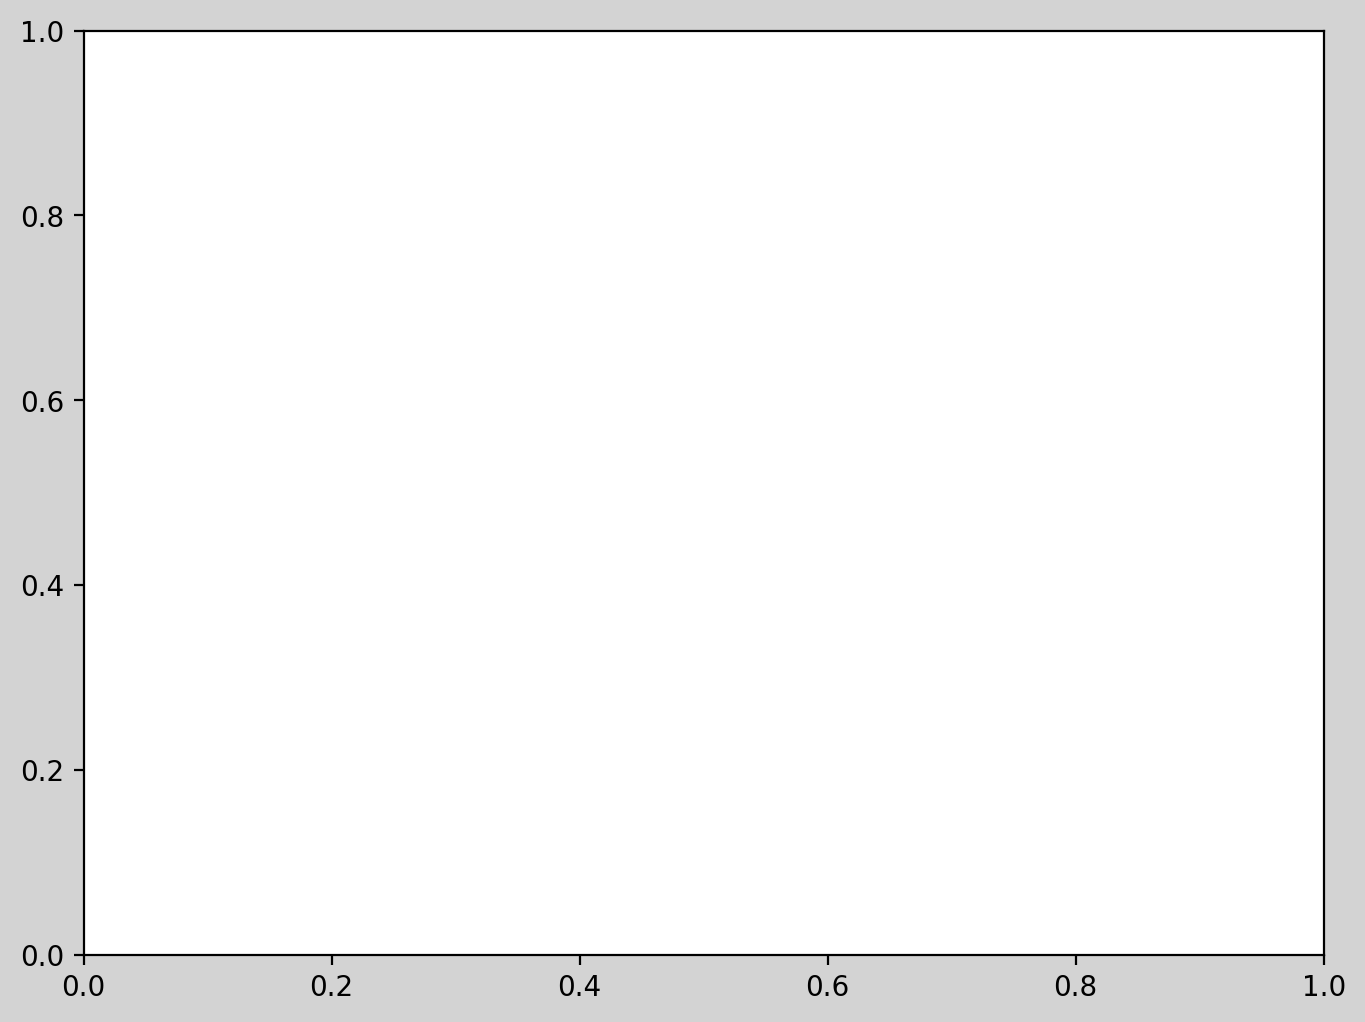

In [6]:
fig, ax = plt.subplots(figsize=(8,6), facecolor='lightgrey', dpi=200) # dpi: dots per inch -> resolution
plt.show()

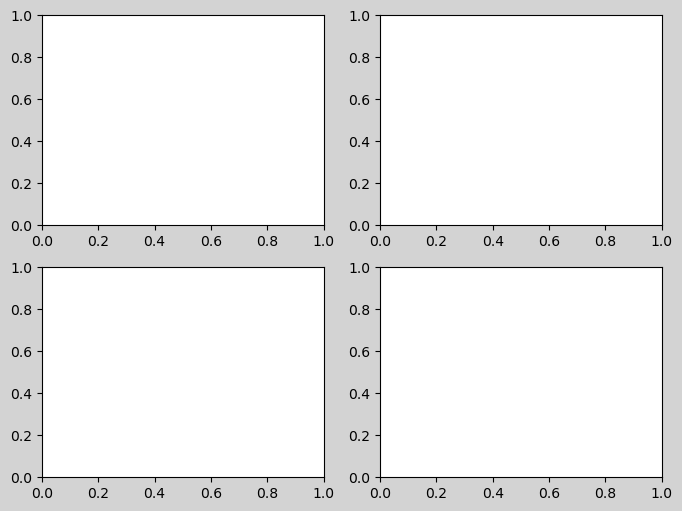

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(8,6), facecolor='lightgrey') # lt.subplots(nrows=2, ncols=2, figsize=(8,6), facecolor='lightgrey')
plt.show()

We will discuss more about multiple axes [later](#iv-multiple-axes)!

## II. Graphical elements

#### II.1. Basic Plot Elements (Primary Graph Types)
| Type       | Method                  | Description                           |
| ---------- | ----------------------- | ------------------------------------- |
| Line       | `ax.plot()`             | Line plot                             |
| Scatter    | `ax.scatter()`          | Scatter plot                          |
| Bar        | `ax.bar()`, `ax.barh()` | Vertical / horizontal bar plot        |
| Histogram  | `ax.hist()`             | Histogram                             |
| Boxplot    | `ax.boxplot()`          | Box plot (summary of distribution)    |
| Pie        | `ax.pie()`              | Pie chart                             |
| ...        | ...                     | ...                                   |

Each method has their own set of arguments. Again, you don't have to memorize all of them. It's literally impossible. Go to the official documentation (most reliable), search online, or use AI assistant.

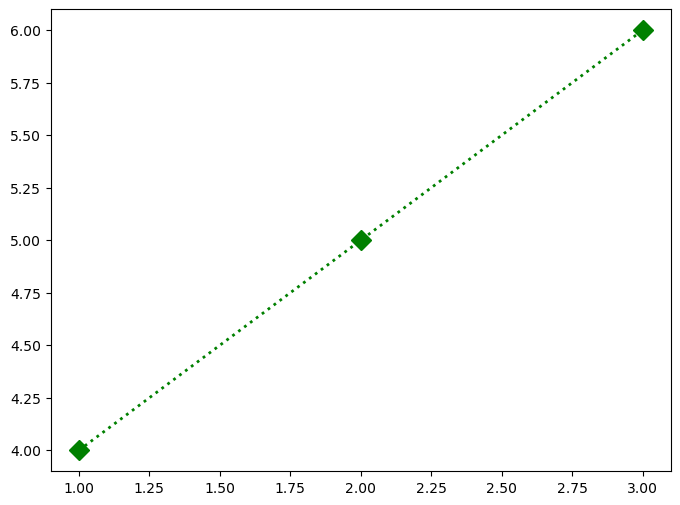

In [8]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot([1,2,3], [4,5,6], 'D:g', linewidth=2, markersize=10)

plt.show()

> People often skip using `fig, ax = plt.subplots()` when creating a single plot. Instead, they use simpler commands like `plt.plot()`. This works because `matplotlib` automatically creates a `Figure` and an `Axes` object behind the scenes. However, I strongly recommend explicitly using `plt.subplots()`—at least in your early practice—so you can become familiar with object-oriented interface. It offers more control and flexibility, especially when you start working with multiple plots or need to fine-tune your figure layout.

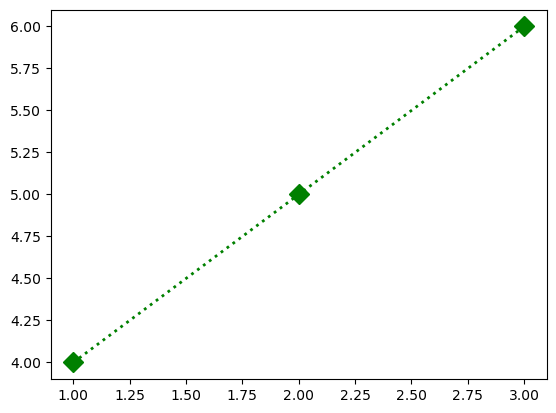

In [9]:
plt.plot([1,2,3], [4,5,6], 'D:g', linewidth=2, markersize=10) # This automatically creates a figure and axes if none exist.
plt.show()

#### II.2. Text and Annotation Elements
| Type       | Method                               | Description                            |
| ---------- | ------------------------------------ | -------------------------------------- |
| Title      | `ax.set_title()`                     | Title for each subplot                 |
| X/Y Labels | `ax.set_xlabel()`, `ax.set_ylabel()` | Labels for x and y axes                |
| Text       | `ax.text(x, y, "text")`              | Place text at any position in the plot |
| Annotate   | `ax.annotate()`                      | Add annotation with optional arrow     |


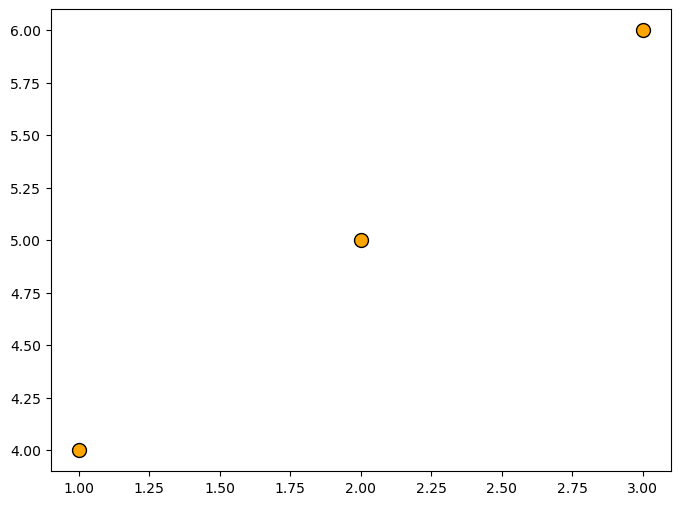

In [10]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter([1,2,3], [4,5,6], marker='o', color='orange', s=100, edgecolor='black')

plt.show()

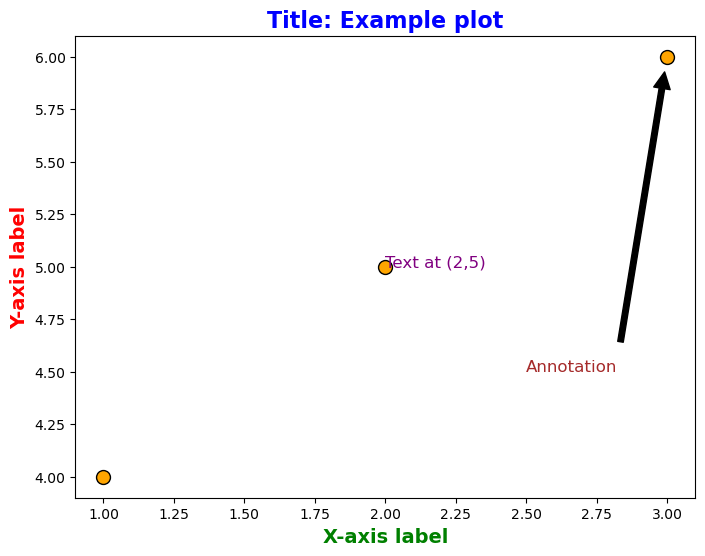

In [11]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter([1,2,3], [4,5,6], marker='o', color='orange', s=100, edgecolor='black')

ax.set_title("Title: Example plot", fontsize=16, fontweight='bold', color='blue')
ax.set_xlabel("X-axis label", fontsize=14, fontweight='bold', color='green')
ax.set_ylabel("Y-axis label", fontsize=14, fontweight='bold', color='red')
ax.text(2, 5, "Text at (2,5)", fontsize=12, color='purple')
ax.annotate("Annotation", xy=(3,6), xytext=(2.5,4.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12, color='brown')

plt.show()

#### II.3. Ticks, Limits, and Grid
| Element     | Method                                         | Description                               |
| ----------- | ---------------------------------------------- | ----------------------------------------- |
| Ticks       | `ax.set_xticks()`, `ax.set_yticks()`           | Specify tick positions                    |
| Tick Labels | `ax.set_xticklabels()`, `ax.set_xticklabels()` | Customize tick labels                     |
| Axis Limits | `ax.set_xlim()`, `ax.set_ylim()`               | Set visible range for x and y axes        |
| Grid        | `ax.grid(True)`                                | Show grid lines                           |


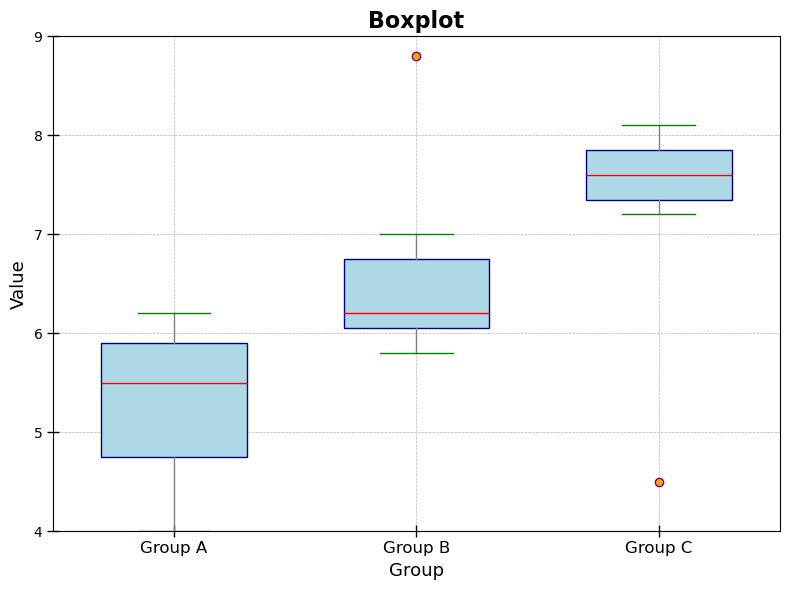

In [12]:
df = pd.DataFrame({
    'Group A': [4, 5, 6, 5.5, 4.5, 6.2, 5.8],
    'Group B': [6, 6.5, 5.8, 6.1, 7, 6.2, 8.8],
    'Group C': [7.5, 4.5, 7.8, 7.9, 7.2, 8.1, 7.6]
})

fig, ax = plt.subplots(figsize=(8, 6))

ax.boxplot([df['Group A'], df['Group B'], df['Group C']],
           widths=0.6, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='navy'),
           medianprops=dict(color='red'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='green'),
           flierprops=dict(marker='o', markersize=6, markerfacecolor='orange', markeredgecolor='purple'))

# --- Ticks & Labels ---
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(df.columns, fontsize=12)
ax.set_yticks([4, 5, 6, 7, 8, 9])
ax.tick_params(axis='both', direction='inout', length=8, width=1, colors='black')

# --- Limits ---
ax.set_xlim(0.5, 3.5)
ax.set_ylim(4, 9)

# --- Grid & Titles ---
ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.6)
ax.set_title('Boxplot', fontsize=16, fontweight='bold')
ax.set_xlabel('Group', fontsize=13)
ax.set_ylabel('Value', fontsize=13)

plt.tight_layout()
plt.show()


#### II.4. Legend
| Method        | Description                                            |
| ------------- | ------------------------------------------------------ |
| `ax.legend()` | Display legend for plotted elements                    |
| `label="..."` | Assign label to each plot element to include in legend |


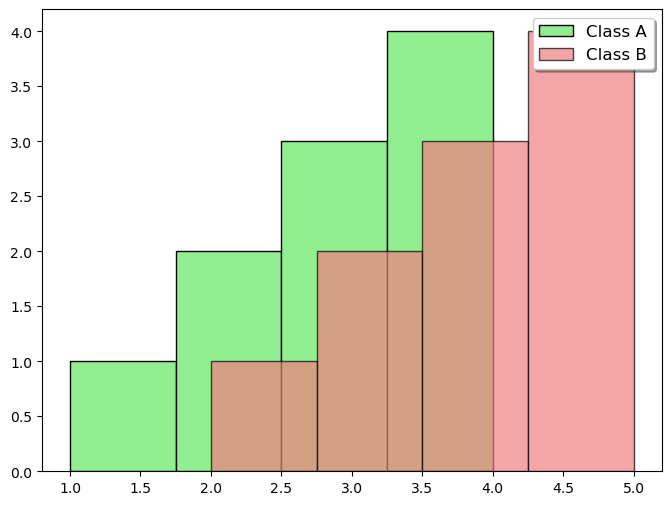

In [13]:
df = pd.DataFrame({
    'Class A': [1, 2, 2, 3, 3, 3, 4, 4, 4, 4],
    'Class B': [2, 3, 3, 4, 4, 4, 5, 5, 5, 5]
})

fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(df['Class A'], bins=4, color='lightgreen', edgecolor='black', label='Class A')
ax.hist(df['Class B'], bins=4, color='lightcoral', edgecolor='black', alpha=0.7, label='Class B') # alpha for transparency

ax.legend(loc='upper right', fontsize=12, shadow=True)
plt.show()

## III. Basic structure of plotting

[Anatomy of a figure](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001_2_00x.png)

Sample code
```python
# data prep
data = ...

# create a fig and ax
fig, ax = plt.subplots(...)

# plot
ax.DESIRED_PLOT(...)
...

# customize (you don't have to modify every detail)
ax.set_xlabel(...)
ax.set_ylabel(...)
ax.set_title(...)
ax.set_xticks(...)
ax.set_xticklabels(...)
ax.set_yticks(...)
ax.set_yticklabels(...)
ax.legend(...)
...

# render
plt.tight_layout()
plt.show()
```

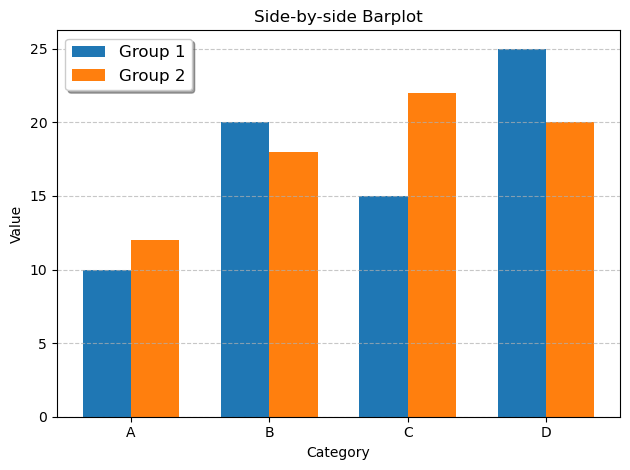

In [14]:
import numpy as np

# data
labels = ['A', 'B', 'C', 'D']
group1 = [10, 20, 15, 25]
group2 = [12, 18, 22, 20]

x = np.arange(len(labels))
width = 0.35

# fig and ax
fig, ax = plt.subplots()

# draw bars
ax.bar(x - width/2, group1, width, label='Group 1')
ax.bar(x + width/2, group2, width, label='Group 2')

# Customize the plot
ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_title('Side-by-side Barplot')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(loc='upper left', fontsize=12, shadow=True)

# render the plot
plt.tight_layout()
plt.show()

## IV. Multiple Axes

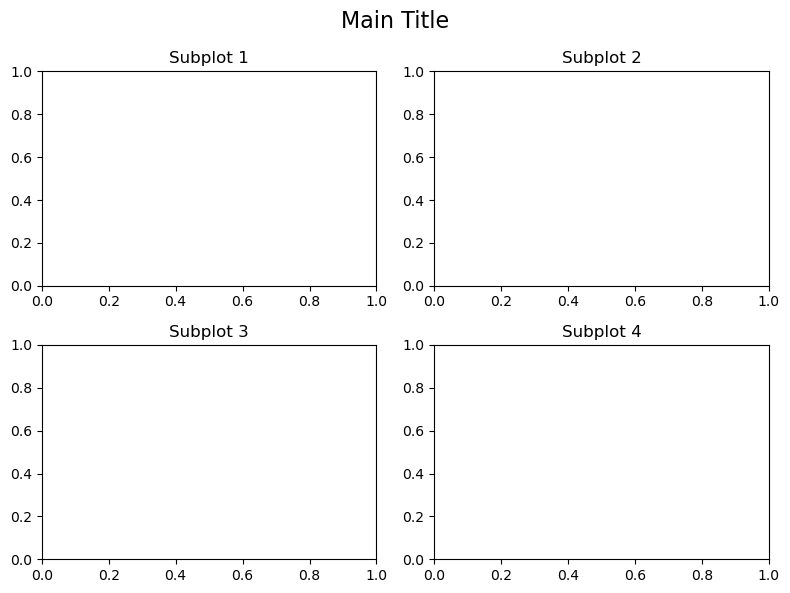

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(8,6))
fig.suptitle("Main Title", fontsize=16)

axes[0,0].set_title("Subplot 1")
axes[0,1].set_title("Subplot 2")
axes[1,0].set_title("Subplot 3")
axes[1,1].set_title("Subplot 4")

plt.tight_layout()
plt.show()

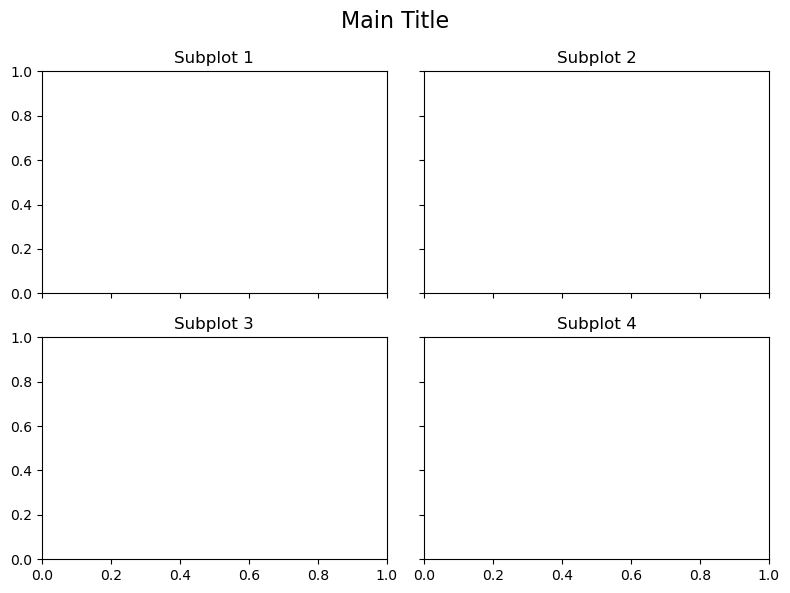

In [16]:
# shared x and y axes
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8,6))
fig.suptitle("Main Title", fontsize=16)

axes[0,0].set_title("Subplot 1")
axes[0,1].set_title("Subplot 2")
axes[1,0].set_title("Subplot 3")
axes[1,1].set_title("Subplot 4")

plt.tight_layout()
plt.show()

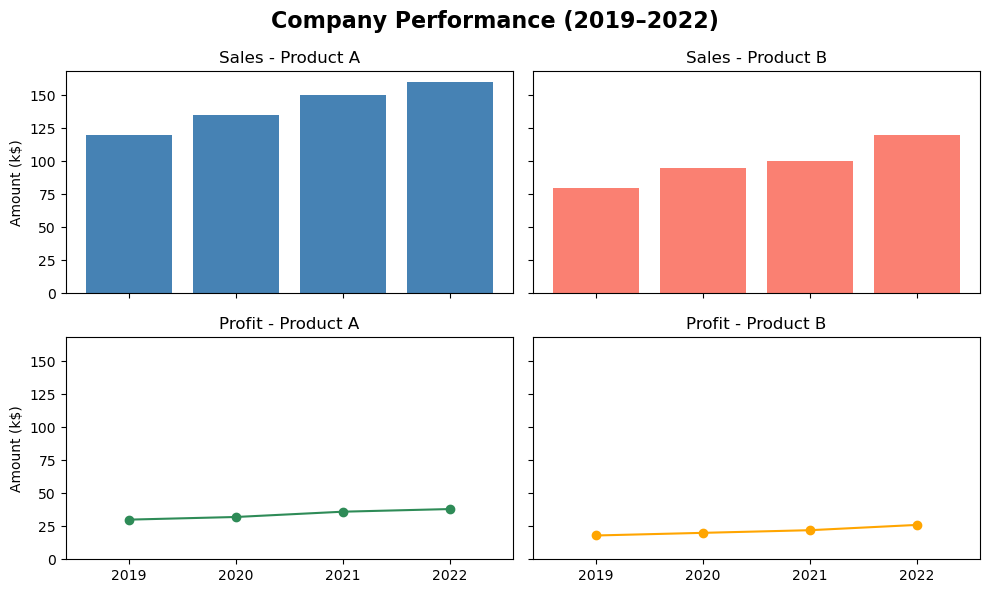

In [17]:
df = pd.DataFrame({
    'Year': [2019, 2020, 2021, 2022],
    'Sales_A': [120, 135, 150, 160],
    'Sales_B': [80, 95, 100, 120],
    'Profit_A': [30, 32, 36, 38],
    'Profit_B': [18, 20, 22, 26]
})

fig, axs = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
fig.suptitle("Company Performance (2019–2022)", fontsize=16, fontweight='bold')

# [0, 0] Sales of A
axs[0, 0].bar(df['Year'], df['Sales_A'], color='steelblue')
axs[0, 0].set_title("Sales - Product A")

# [0, 1] Sales of B
axs[0, 1].bar(df['Year'], df['Sales_B'], color='salmon')
axs[0, 1].set_title("Sales - Product B")

# [1, 0] Profit of A
axs[1, 0].plot(df['Year'], df['Profit_A'], color='seagreen', marker='o')
axs[1, 0].set_title("Profit - Product A")

# [1, 1] Profit of B
axs[1, 1].plot(df['Year'], df['Profit_B'], color='orange', marker='o')
axs[1, 1].set_title("Profit - Product B")


for ax in axs[1, :]:
    ax.set_xticks(df['Year'])
    ax.set_xticklabels(df['Year'])

for ax in axs[:, 0]:   
    ax.set_ylabel("Amount (k$)")

plt.tight_layout()
plt.show()

## V. Save

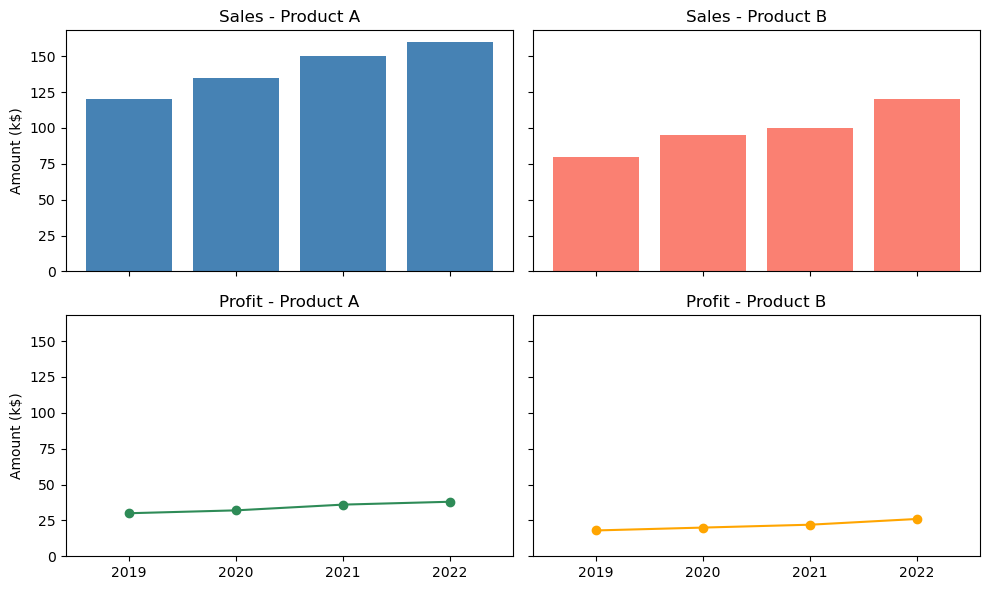

In [18]:
df = pd.DataFrame({
    'Year': [2019, 2020, 2021, 2022],
    'Sales_A': [120, 135, 150, 160],
    'Sales_B': [80, 95, 100, 120],
    'Profit_A': [30, 32, 36, 38],
    'Profit_B': [18, 20, 22, 26]
})

fig, axs = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)

# [0, 0] Sales of A
axs[0, 0].bar(df['Year'], df['Sales_A'], color='steelblue')
axs[0, 0].set_title("Sales - Product A")

# [0, 1] Sales of B
axs[0, 1].bar(df['Year'], df['Sales_B'], color='salmon')
axs[0, 1].set_title("Sales - Product B")

# [1, 0] Profit of A
axs[1, 0].plot(df['Year'], df['Profit_A'], color='seagreen', marker='o')
axs[1, 0].set_title("Profit - Product A")

# [1, 1] Profit of B
axs[1, 1].plot(df['Year'], df['Profit_B'], color='orange', marker='o')
axs[1, 1].set_title("Profit - Product B")


for ax in axs[1, :]:
    ax.set_xticks(df['Year'])
    ax.set_xticklabels(df['Year'])

for ax in axs[:, 0]:   
    ax.set_ylabel("Amount (k$)")

plt.tight_layout()
plt.show()

In [19]:
fig.savefig("example.svg")
fig.savefig("example.pdf")
fig.savefig("example.png")

## VI. Tips? $\LaTeX$
You can also include math expressions by using `r$MATH_EXPRESSION$`

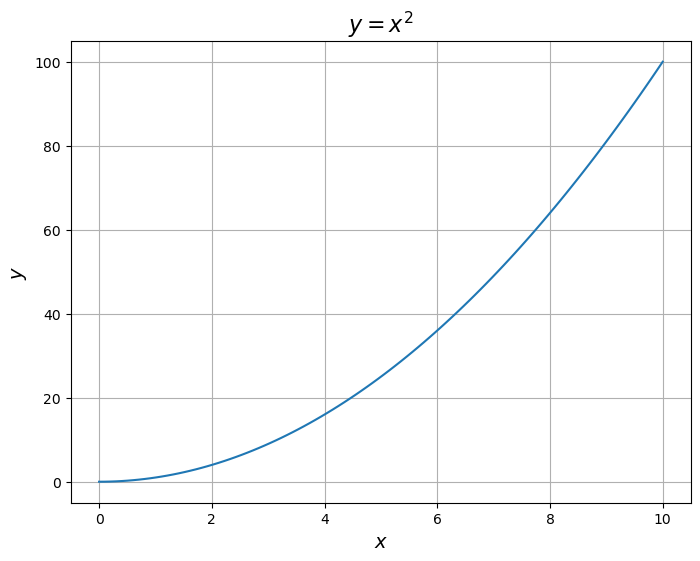

In [20]:
x = np.linspace(0, 10, 100)
y = x**2

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y)

ax.set_title(r'$y = x^2$', fontsize=16, fontweight='bold')
ax.set_xlabel(r'$x$', fontsize=14)
ax.set_ylabel(r'$y$', fontsize=14)
plt.grid()

plt.show()

# Seaborn

In [21]:
import seaborn as sns

`seaborn` is a Python visualization library built on top of `matplotlib`. It provides a simpler and more convenient interface for creating attractive and informative statistical graphics.

- DataFrame-friendly: Seaborn works directly with `pandas` DataFrames — you can pass column names instead of separate arrays. However, the DataFrame should be a long-format.
- Better styling by default: Seaborn applies clean, professional-looking themes automatically.
- Built-in statistical visualization.

Time to level up on your own! Head over to the [official website](https://seaborn.pydata.org/).

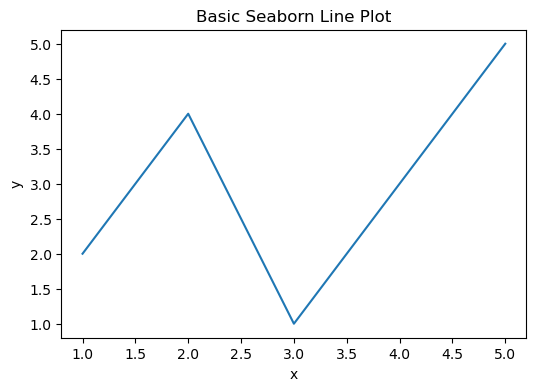

In [22]:
df = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [2, 4, 1, 3, 5]
})

fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(data=df, x='x', y='y', ax=ax)

ax.set_title("Basic Seaborn Line Plot")

plt.show()

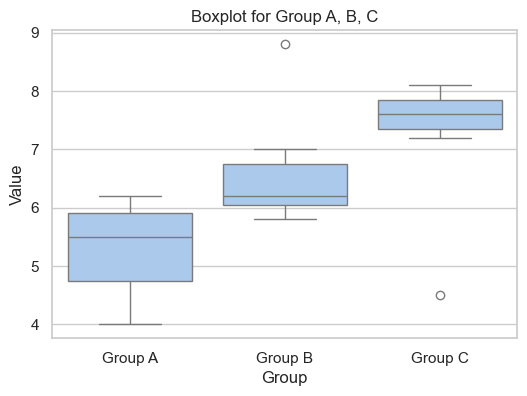

In [23]:
df = pd.DataFrame({
    'Group A': [4, 5, 6, 5.5, 4.5, 6.2, 5.8],
    'Group B': [6, 6.5, 5.8, 6.1, 7, 6.2, 8.8],
    'Group C': [7.5, 4.5, 7.8, 7.9, 7.2, 8.1, 7.6]
})

# wide → long format
df_long = df.melt(var_name='Group', value_name='Value')

# Set Seaborn theme
sns.set_theme(style='whitegrid', palette='pastel')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Seaborn boxplot
sns.boxplot(data=df_long, x='Group', y='Value', ax=ax)

plt.title("Boxplot for Group A, B, C")
plt.show()

# Plotly

In [24]:
import plotly.graph_objects as go  

#### Workflow

**0. Data**

In [25]:
df = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [10, 12, 9, 14, 16]
})

**1. Create an empty figure**

Use `fig = go.Figure()` to initialize a blank figure object. This is the container that will eventually hold all traces and layout settings. Unlike `matplotlib`, an empty figure will still be rendered and visible even if it contains no data.

In [26]:
fig = go.Figure()
print(type(fig))
fig.show()

<class 'plotly.graph_objs._figure.Figure'>


**2. Add data visualizations**

Use `fig.add_trace()` to add one or more data visualizations depending on the type of chart you want. In `plotly`, one layer of data visualization is called a `trace`.

| Chart Type         | Trace Class       | Description                                                                                        |
| ------------------ | ----------------- | -------------------------------------------------------------------------------------------------- |
| **Scatter / Line** | `go.Scatter()`    | General-purpose: line plot, scatter plot, or both (`mode='lines'`, `'markers'`, `'lines+markers'`) |
| **Bar Chart**      | `go.Bar()`        | Vertical or horizontal bar plots for categories                                                    |
| **Box Plot**       | `go.Box()`        | Visualizes distribution: median, quartiles, outliers                                               |
| **Histogram**      | `go.Histogram()`  | Frequency distribution of one variable                                                             |
| **Pie / Donut**    | `go.Pie()`        | Circular chart for proportions; use `hole=0.4` for donut                                           |
| **Choropleth Map** | `go.Choropleth()` | Color-coded map by region (e.g., income by county/state)                                           |

In [27]:
fig.add_trace(go.Scatter(
    x=df['x'],
    y=df['y'],
    mode='lines+markers',       # 'lines', 'markers', or 'lines+markers'
    name='Line 1',
    line=dict(color='royalblue', width=2),
    marker=dict(size=8)
))

fig.show()

**3. Configure layout and interactivity**

Customize the figure’s appearance and interactivity using fig.update_layout(). This includes title, axis labels, background color, dropdowns, sliders, buttons, animations, and more.

In [28]:
fig.update_layout(
    title='Line Plot from DataFrame',
    xaxis_title='X Axis',
    yaxis_title='Y Axis',
    width=700,
    height=500,
    template='plotly' # 'plotly', 'plotly_white', 'ggplot2', 'seaborn', 'simple_white', 'none', etc.
)

fig.show()

**4. Render the plot**

Finally, display the figure using `fig.show()`.

In [29]:
fig.show()

#### Exercise
Now, can you understand the code we used before?

```python
# Choropleth
fig = go.Figure()

# Income trace
fig.add_trace(go.Choropleth(
    geojson=counties,
    locations=df1['FIPS'],
    z=df1['income'],
    colorscale='Greens',
    zmin=df1['income'].min()*0.8,
    zmax=df1['income'].max(),
    colorbar_title="Income",
    marker_line_width=0,
    visible=True,
    name="Income"
))

# AQI trace
fig.add_trace(go.Choropleth(
    geojson=counties,
    locations=df2['FIPS'],
    z=df2['aqi'],
    colorscale='Reds',
    zmin=0,
    zmax=df2['aqi'].max(),
    colorbar_title="AQI",
    marker_line_width=0,
    visible=False,
    name="AQI"
))

# Layout and Dropdown menu
fig.update_layout(
    title_text="County-Level Income and Air Quality (AQI)",
    autosize=False,
    geo_scope='usa',
    updatemenus=[dict(
        active=0,
        buttons=list([
            dict(label="Income",
                 method="update",
                 args=[{"visible": [True, False]},
                       {"coloraxis": {"colorbar": {"title": "Income"}},
                        "title": "County-Level Income"}]),
            dict(label="AQI",
                 method="update",
                 args=[{"visible": [False, True]},
                       {"coloraxis": {"colorbar": {"title": "AQI"}},
                        "title": "County-Level Air Quality Index"}])
        ]),
        direction="down",
        showactive=True
    )]
)

fig.show()
```